In [1]:
# importing libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read dataset of train

dataset = pd.read_csv('dataset_passengers.csv')
number_of_passengers = dataset.iloc[:,1]
dataset

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [3]:
# min max of data

number_of_passengers.min(axis=0) ,number_of_passengers.max(axis=0)

(104.0, 622.0)

In [4]:
# scale data between 0 and 1

min = number_of_passengers.min(axis=0)
max = number_of_passengers.max(axis=0)
X_std = (number_of_passengers - min) / (max - min)
X_scaled = X_std 
X_scaled

0      0.015444
1      0.027027
2      0.054054
3      0.048263
4      0.032819
         ...   
140    0.779923
141    0.689189
142    0.552124
143    0.633205
144         NaN
Name: International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60, Length: 145, dtype: float64

In [5]:
# split data for train and test 

X_split1 = X_scaled[:100]
X_split2 = X_scaled[100:145]


X_train = []
Y_train = []
X_number_train = []
for i in range(5,100):
  X_train.append(X_split1[i-5:i])
  Y_train.append(X_split1[i])
  X_number_train.append(i)

In [6]:
# reforming data

X_train,Y_train = np.array(X_train),np.array(Y_train)
X_train.shape , Y_train.shape

((95, 5), (95,))

In [7]:
# test data

X_test_ = []
for i in range(5):
  X_test_.append(X_split1[95+i])

for i in range(100,144):
  X_test_.append(X_split2[i])

len(X_test_)


49

In [8]:
X_test = []
Y_test = []
X_number_test = []

for i in range(5,49):
  X_test.append(X_test_[i-5:i])
  Y_test.append(X_test_[i])
  X_number_test.append(i+95)


In [9]:
# reforming data 

X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_test.shape ,Y_test.shape

((44, 5), (44,))

In [10]:
# reshape train data 

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(95, 5, 1)

In [11]:
# reshape test data

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(44, 5, 1)

In [12]:
# import libs

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Preparing sequential model

model = Sequential()

In [14]:
# First LSTM Layer 
model.add(LSTM(units=150, input_shape=(X_train.shape[1],1) , return_sequences=True))
model.add(Dropout(0.2))

# Second LSTM Layer
model.add(LSTM(units=120))
model.add(Dropout(0.2))

# final output layer
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 5, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 120)               130080    
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 221,401
Trainable params: 221,401
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile model
model.compile(optimizer='adam', loss='MSE')

# fit model
history = model.fit(X_train,Y_train,epochs=200,batch_size=32,validation_split=0.05)

Epoch 1/200
3/3 [==============================] - 4s 418ms/step - loss: 0.0603 - val_loss: 0.1039
Epoch 2/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0271 - val_loss: 0.0301
Epoch 3/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0112 - val_loss: 0.0054
Epoch 4/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0136 - val_loss: 0.0054
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0074 - val_loss: 0.0201
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 0.0099 - val_loss: 0.0214
Epoch 8/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0087 - val_loss: 0.0124
Epoch 9/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 10/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 11/200
3/3 [

In [16]:
# Predict number of passengers for test dataset
y_predict = model.predict(X_test)

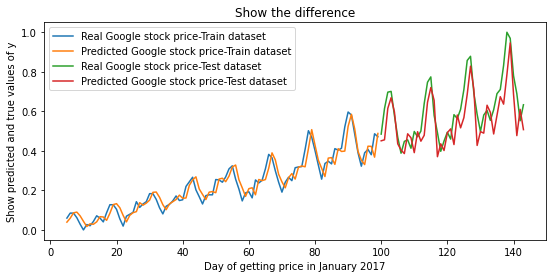

In [17]:
# illustrate train and test dataset with their prediction 

plt.figure(figsize=(9, 4))


plt.plot(X_number_train, Y_train, label='Real Google stock price-Train dataset')
plt.plot(X_number_train, model.predict(X_train), label='Predicted Google stock price-Train dataset')
  

plt.plot(X_number_test, Y_test, label='Real Google stock price-Test dataset')
plt.plot(X_number_test, y_predict, label='Predicted Google stock price-Test dataset')
  
plt.xlabel('Day of getting price in January 2017')
plt.ylabel('Show predicted and true values of y')
plt.title("Show the difference")

plt.legend()

In [18]:
train_loss = model.evaluate(X_train, Y_train, verbose=0)
train_loss

0.0017769007245078683

In [19]:
test_loss = model.evaluate(X_test, Y_test, verbose=0)
test_loss

0.009773622266948223